## Instructions

- Follow the installation instructions in the readme file
- Answer the questions in this notebook
- Once your work is finished: restart the kernel, run all cells in order and check that the outputs are correct.
- Send your completed notebook to `remy.degenne@inria.fr` with email title `SL_TP2_NAME1_NAME2` (or `SL_TP2_NAME` if you work alone).

**Deadline: January 16, 15:00 CET**.

If you don't want to use a local installation, you can try Google Colab:

<a target="_blank" href="https://colab.research.google.com/github/RemyDegenne/remydegenne.github.io/blob/master/docs/SL_2023/Bandit.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
# This cell is setting up google colab. Ignore it if you work locally.
if 'google.colab' in str(get_ipython()):
    print("Installing packages, please wait a few moments. Restart the runtime after the installation.")
    # install rlberry library
    !pip install scipy rlberry

In [1]:
import numpy as np
import random as rd
import scipy.stats as st
import gymnasium as gym
from matplotlib import pyplot as plt
import time

rng = np.random.default_rng(45161641614384786754156467846542343184353443258463569)

c:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Bandits

Bandits can be seen as RL with only one state. A bandit environment with $K$ actions (or arms) is parametrized by $K$ distributions $\nu_1, \ldots, \nu_K$ with finite means $\mu_1, \ldots, \mu_K$. At each time $t \in \mathbb{N}$, an agent
- chooses an arm $A_t \in \{1, \ldots, K\}$ (possibly based on previous observations)
- gets a reward $X_{A_t, t} \sim \nu_{A_t}$ samples from the distribution of arm $A_t$

In the regret minimization setting, the agent seeks to minimize its expected regret at some horizon $T$,
$$R_T = T \max_k \mu_k - \sum_{t = 1}^T \mu_{A_t} \: .$$

More precisely, we will evaluate agents/algorithms based on their expected regret $\mathbb{E}[R_T]$.

**Implement a function that computes the regret of a sequence of actions**

The result will be an array of length T = len(actions) containing the values of $R_t$ for all $t < T$.

In [2]:
def regret(means, actions):
    """
    Compute the regret of a sequence of actions on a bandit problem with given means

    means: numpy.ndarray; vector of means of the arm distributions, of size K
    actions: list of int in 0, ..., K-1; sequence of actions

    Returns: numpy.ndarray; regret of the sequence of actions at each time t <= len(actions)
    """
    return np.cumsum(np.max(means) - means[actions])

### Bandit environments

We will test our bandits algorithms on Gaussian distributions with variance 1 and on Bernoulli distributions.

In [3]:
class Bandit:
    def __init__(self, distrib):
        self.distributions = distrib
        self.means = [dist.mean() for dist in distrib]

    def sample(self, arm, n=1):
        # return n samples from one arm distribution, as a numpy array
        return self.distributions[arm].rvs(n)

class GaussianBandit(Bandit):
    def __init__(self, means):
        distrib = [st.norm(loc=m) for m in means]
        super().__init__(distrib) 

class BernoulliBandit(Bandit):
    def __init__(self, means):
        distrib = [st.bernoulli(p=m) for m in means]
        super().__init__(distrib) 

Example:

In [4]:
mu = np.array([0.3, 0.5, 0.25])
K = len(mu)
B1 = GaussianBandit(mu)
B2 = BernoulliBandit(mu)
print(B1.sample(2, 10))  # 10 samples of arm 2 in bandit B1
print(B1.means[2])  # mean of arm 2 in bandit B1
print(B2.sample(2))  # 1 sample of arm 2 in bandit B2
print(B2.means[2])  # mean of arm 2 in bandit B2

[ 0.52689759  0.75744816  0.30814739  0.5264184   0.14845239  0.04493609
  1.00632398 -0.6311193   0.95759931 -0.37656645]
0.25
[0]
0.25


# Failure of Follow-The-Leader

The Follow-The-Leader algorithm (FTL) for bandits pulls each arm once and then pulls at each time the arm with highest empirical mean. That is, it pulls
$$
A_t = \arg\max_a \hat{\mu}_{t,a}
$$
where $\hat{\mu}_{t,a} = \frac{1}{N_{t,a}}\sum_{s=1}^{t-1} X_{A_s, s} \mathbb{I}\{A_s = a\}$ and $N_{t,a} = \sum_{s=1}^{t-1} \mathbb{I}\{A_s = a\}$.

**What is in general the dependence in the horizon $T$ of the expected regret of FTL?**

$E_µ(N_a(T))= $

**Implement the Follow-The-Leader algorithm**

In general, a bandit algorithm uses the whole sequence of past interactions to decide which arm should be pulled next. However, all algorithm we will implement in this notebook are functions of the number of past pulls of the arms and their empirical means, as well as the current time. 

In [5]:
def FTL(emp_means, nb_pulls, t):
    """
    Follow-The-Leader arm selection

    emp_means: numpy.ndarray; vector of empirical means of the arms
    nb_pulls: numpy.ndarray; number of times each arm was chosen previously
    t: int; current time
    
    Returns: int; arm selected by FTL
    """

    if t < len(emp_means):
        return t
    return np.argmax(emp_means)

    

**Plot the mean regret of FTL on a Gaussian bandit with 4 arms with means [0.3, 0.5, 0.25, 0.1] as a function of $t$ up to $T = 2000$, averaged over 30 experiments.**

In [6]:
T = 2000
N = 30

C:\Users\NICOLAS\AppData\Local\Temp\ipykernel_14324\4046814753.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  emp_means[arm] = (emp_means[arm]*(nb_pulls[arm]-1) + rewards)/nb_pulls[arm]


[0 1 2 3 1 0 0 3 0 1 0 0 0 0 0 1 0 3 1 0]


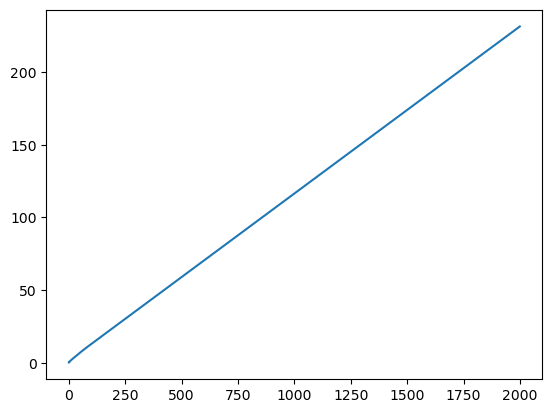

In [7]:
#build a bandit with arms 0.3,0.5,0.25,0.1
mu = np.array([0.3, 0.5, 0.25, 0.1])
B = GaussianBandit(mu)
K=len(mu)
#run FTL on the bandit
regrets = np.zeros((T,N))
for n in range(N):
    emp_means = np.zeros(K)
    nb_pulls = np.zeros(K)
    actions = np.zeros(T, dtype=int)
    for t in range(T):
        arm = FTL(emp_means, nb_pulls, t)
        actions[t] = arm
        rewards = B.sample(arm)
        regrets[t,n] = regret(mu, actions[:t+1])[t]
        nb_pulls[arm] += 1
        emp_means[arm] = (emp_means[arm]*(nb_pulls[arm]-1) + rewards)/nb_pulls[arm]
print(actions[:20])
mean_regret = np.mean(regrets, axis=1)
plt.plot(mean_regret)
plt.show()





C:\Users\NICOLAS\AppData\Local\Temp\ipykernel_14324\4046814753.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  emp_means[arm] = (emp_means[arm]*(nb_pulls[arm]-1) + rewards)/nb_pulls[arm]


[0 1 2 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1]


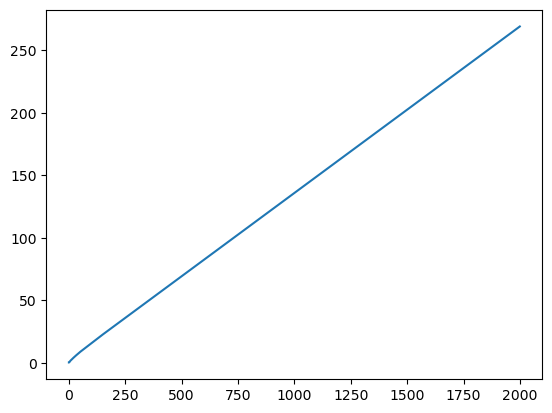

In [8]:
#build a bandit with arms 0.3,0.5,0.25,0.1
mu = np.array([0.3, 0.5, 0.25, 0.1])
B = GaussianBandit(mu)
K=len(mu)
#run FTL on the bandit
regrets = np.zeros((T,N))
for n in range(N):
    emp_means = np.zeros(K)
    nb_pulls = np.zeros(K)
    actions = np.zeros(T, dtype=int)
    for t in range(T):
        arm = FTL(emp_means, nb_pulls, t)
        actions[t] = arm
        rewards = B.sample(arm)
        regrets[t,n] = regret(mu, actions[:t+1])[t]
        nb_pulls[arm] += 1
        emp_means[arm] = (emp_means[arm]*(nb_pulls[arm]-1) + rewards)/nb_pulls[arm]
print(actions[:20])
mean_regret = np.mean(regrets, axis=1)
plt.plot(mean_regret)
plt.show()





**Look at several individual runs of FTL (in particular look at the sequence of actions). How can we explain the bad expected regret of FTL?**

For every try we did, the curve tend towards a linear curve with a slope between 0.2 and 0.4. This is due to the fact that the algorithm will always pull the arm with the highest empirical mean after some time. However, the arm with the highest empirical mean is not necessarily the arm with the highest mean. This is why the regret is not 0.

On the two examples we displayed, the algorithm find the arm number 1 to be the best and then the arm 0.

# $\varepsilon$-greedy

In order to obtain sub-linear regret, an algorithm should balance *exploration* and *exploitation*. The $\varepsilon$-greedy algorithm selects with probability $\varepsilon$ an arm uniformly at random (exploration) and with probability $1 - \varepsilon$ it chooses the empirical best arm like FTL.

**Implement $\varepsilon$-greedy for a decreasing $\varepsilon_t = c/t$, where $c$ is a parameter and $t$ is the current time.**

In [9]:
def eps_greedy(emp_means, nb_pulls, t,eps_0):
    """
    eps-greedy arm selection

    emp_means: numpy.ndarray; vector of empirical means of the arms
    nb_pulls: numpy.ndarray; number of times each arm was chosen previously
    t: int; current time
    
    Returns: int; arm selected by eps-greedy
    """
    eps = eps_0/(t+1)
    if rng.random() < eps:
        return rng.integers(0, len(emp_means))
    else:
        if 0 in nb_pulls:
            return np.argmin(nb_pulls)
    return np.argmax(emp_means)

# UCB

The UCB algorithm is optimistic: it selects the arm with highest upper confidence bound. Using concentration of measure arguments, we can construct confidence intervals on the means of each arm, such that the true mean belongs to the interval with large enough probability. UCB then selects the arm with highest upper bound for the confidence interval.

The algorithm starts by pulling all arms: $A_t = t$ for $t \le K$. Then, using a confidence interval obtained from a 1-sub-Gaussian assumption, UCB selects

$$A_t = \arg\max_a \hat{\mu}_{t,a} + \sqrt{\frac{2 \log t}{N_{t,a}}} \: .$$



**Implement the UCB algorithm**

In [10]:
def UCB(emp_means, nb_pulls, t):
    """
    UCB arm selection

    emp_means: numpy.ndarray; vector of empirical means of the arms
    nb_pulls: numpy.ndarray; number of times each arm was chosen previously
    t: int; current time
    
    Returns: int; arm selected by UCB
    """
    if 0 in nb_pulls:
        return np.argmin(nb_pulls)
    UCB=np.zeros(len(emp_means))
    for i in range(len(emp_means)):
        UCB[i]=emp_means[i]+np.sqrt(2*np.log(t)/nb_pulls[i])
    return np.argmax(UCB)

**Plot the mean regret of FTL, $\varepsilon_t$-greedy and UCB on a Gaussian bandit with 4 arms with means [0.3, 0.5, 0.25, 0.1] as a function of $t$ up to $T = 2000$, averaged over 30 experiments.**

See the lecture notes for a good theoretical choice of the parameter $c$ in $\varepsilon_t$-greedy.

In [11]:
T=2000
N=30
mu = np.array([0.3, 0.5, 0.25, 0.1])
B = GaussianBandit(mu)
K=len(mu)

We try some arbitrary epsilon just to test the function.

C:\Users\NICOLAS\AppData\Local\Temp\ipykernel_14324\553528581.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  emp_means[arm] = (emp_means[arm]*(nb_pulls[arm]-1) + rewards)/nb_pulls[arm]


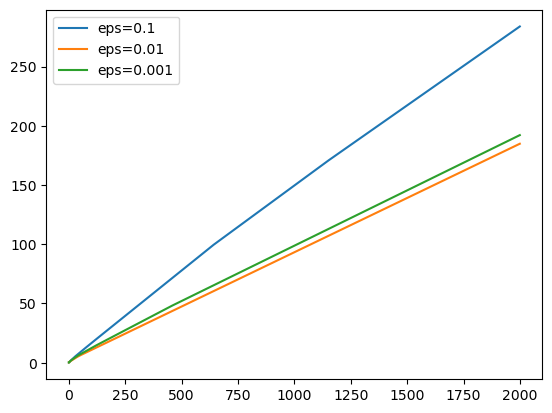

In [12]:
for eps in [0.1, 0.01, 0.001]:
    regrets = np.zeros((T,N))
    for n in range(N):
        emp_means = np.zeros(K)
        nb_pulls = np.zeros(K)
        actions = np.zeros(T, dtype=int)
        for t in range(T):
            arm = eps_greedy(emp_means, nb_pulls, t,eps)
            actions[t] = arm
            rewards = B.sample(arm)
            regrets[t,n] = regret(mu, actions[:t+1])[t]
            nb_pulls[arm] += 1
            emp_means[arm] = (emp_means[arm]*(nb_pulls[arm]-1) + rewards)/nb_pulls[arm]
    mean_regret = np.mean(regrets, axis=1)
    plt.plot(mean_regret, label=f"eps={eps}")
plt.legend()
plt.show()


We know the means of the arms, so we can choose (from the lecture) $\epsilon_t = \frac{K}{d^2 t}$ with $d = \min_{i \neq j} |\mu_i - \mu_j|$. Here $d = 0.2$ so we can choose $\epsilon_t = \frac{100}{t}$ (i.e c = 100).

C:\Users\NICOLAS\AppData\Local\Temp\ipykernel_14324\2540107705.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  emp_means[arm] = (emp_means[arm]*(nb_pulls[arm]-1) + rewards)/nb_pulls[arm]
C:\Users\NICOLAS\AppData\Local\Temp\ipykernel_14324\2540107705.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  emp_means[arm] = (emp_means[arm]*(nb_pulls[arm]-1) + rewards)/nb_pulls[arm]
C:\Users\NICOLAS\AppData\Local\Temp\ipykernel_14324\2540107705.py:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operati

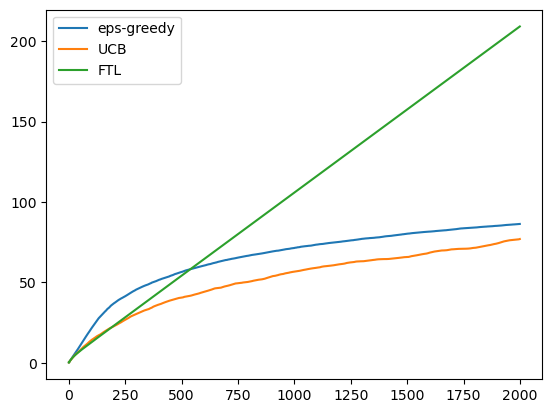

In [13]:
T=2000
N=30
mu = np.array([0.3, 0.5, 0.25, 0.1])
B = GaussianBandit(mu)
K=len(mu)
eps_0=100

for n in range(N):
    emp_means = np.zeros(K)
    nb_pulls = np.zeros(K)
    actions = np.zeros(T, dtype=int)
    for t in range(T):
        arm = eps_greedy(emp_means, nb_pulls, t,eps_0)
        actions[t] = arm
        rewards = B.sample(arm)
        regrets[t,n] = regret(mu, actions[:t+1])[t]
        nb_pulls[arm] += 1
        emp_means[arm] = (emp_means[arm]*(nb_pulls[arm]-1) + rewards)/nb_pulls[arm]
mean_regret = np.mean(regrets, axis=1)
plt.plot(mean_regret)

for n in range(N):
    emp_means = np.zeros(K)
    nb_pulls = np.zeros(K)
    actions = np.zeros(T, dtype=int)
    for t in range(T):
        arm = UCB(emp_means, nb_pulls, t)
        actions[t] = arm
        rewards = B.sample(arm)
        regrets[t,n] = regret(mu, actions[:t+1])[t]
        nb_pulls[arm] += 1
        emp_means[arm] = (emp_means[arm]*(nb_pulls[arm]-1) + rewards)/nb_pulls[arm]
mean_regret = np.mean(regrets, axis=1)
plt.plot(mean_regret)

for n in range(N):
    emp_means = np.zeros(K)
    nb_pulls = np.zeros(K)
    actions = np.zeros(T, dtype=int)
    for t in range(T):
        arm = FTL(emp_means, nb_pulls, t)
        actions[t] = arm
        rewards = B.sample(arm)
        regrets[t,n] = regret(mu, actions[:t+1])[t]
        nb_pulls[arm] += 1
        emp_means[arm] = (emp_means[arm]*(nb_pulls[arm]-1) + rewards)/nb_pulls[arm]
mean_regret = np.mean(regrets, axis=1)
plt.plot(mean_regret)
plt.legend(["eps-greedy","UCB","FTL"])
plt.show()

**Comment on the graph. What is the dependence in $T$ of the regret of UCB?**

#TODO answer here

Consider the following variant UCB(c), which takes a parameter $c>0$,
$$A_t = \arg\max_a \hat{\mu}_{t,a} + \sqrt{\frac{c \log t}{N_{t,a}}} \: .$$

**Implement UCB(c) and plot the regret of UCB(c) for varying values of $c$, first for the Gaussian bandit, then for a Bernoulli bandit with same means. Discuss.**

C:\Users\NICOLAS\AppData\Local\Temp\ipykernel_14324\1366870710.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  emp_means[arm] = (emp_means[arm]*(nb_pulls[arm]-1) + rewards)/nb_pulls[arm]


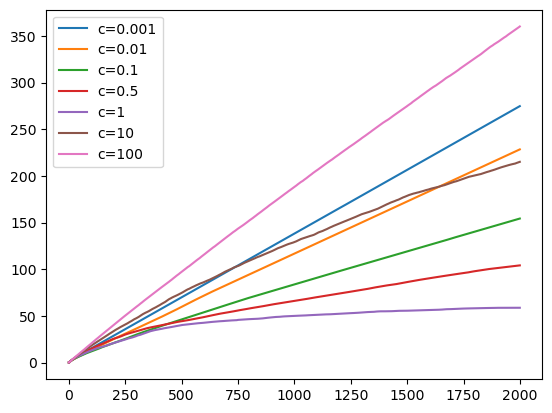

In [14]:
def UCB(emp_means, nb_pulls, t,c):
    """
    UCB arm selection

    emp_means: numpy.ndarray; vector of empirical means of the arms
    nb_pulls: numpy.ndarray; number of times each arm was chosen previously
    t: int; current time
    
    Returns: int; arm selected by UCB
    """
    if 0 in nb_pulls:
        return np.argmin(nb_pulls)
    UCB=np.zeros(len(emp_means))
    for i in range(len(emp_means)):
        UCB[i]=emp_means[i]+np.sqrt(c*np.log(t)/nb_pulls[i])
    return np.argmax(UCB)

T=2000
N=30
mu = np.array([0.3, 0.5, 0.25, 0.1])
B = GaussianBandit(mu)
K=len(mu)
C=[0.001,0.01,0.1,0.5,1,10,100]

for c in C:
    regrets = np.zeros((T,N))
    for n in range(N):
        emp_means = np.zeros(K)
        nb_pulls = np.zeros(K)
        actions = np.zeros(T, dtype=int)
        for t in range(T):
            arm = UCB(emp_means, nb_pulls, t,c)
            actions[t] = arm
            rewards = B.sample(arm)
            regrets[t,n] = regret(mu, actions[:t+1])[t]
            nb_pulls[arm] += 1
            emp_means[arm] = (emp_means[arm]*(nb_pulls[arm]-1) + rewards)/nb_pulls[arm]
    mean_regret = np.mean(regrets, axis=1)
    plt.plot(mean_regret, label=f"c={c}")
plt.legend()
plt.show()

C:\Users\NICOLAS\AppData\Local\Temp\ipykernel_14324\3184260656.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  emp_means[arm] = (emp_means[arm]*(nb_pulls[arm]-1) + rewards)/nb_pulls[arm]


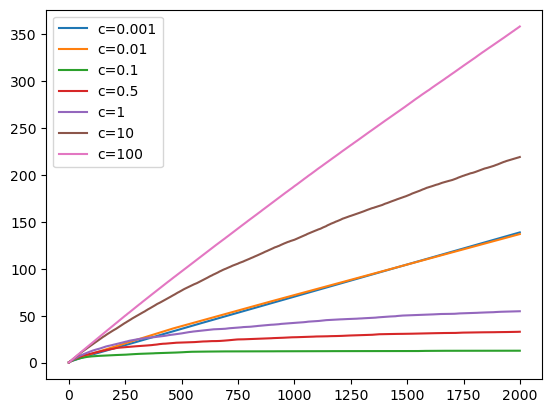

In [15]:

T=2000
N=30
mu = np.array([0.3, 0.5, 0.25, 0.1])
B = BernoulliBandit(mu)
K=len(mu)
C=[0.001,0.01,0.1,0.5,1,10,100]

for c in C:
    regrets = np.zeros((T,N))
    for n in range(N):
        emp_means = np.zeros(K)
        nb_pulls = np.zeros(K)
        actions = np.zeros(T, dtype=int)
        for t in range(T):
            arm = UCB(emp_means, nb_pulls, t,c)
            actions[t] = arm
            rewards = B.sample(arm)
            regrets[t,n] = regret(mu, actions[:t+1])[t]
            nb_pulls[arm] += 1
            emp_means[arm] = (emp_means[arm]*(nb_pulls[arm]-1) + rewards)/nb_pulls[arm]
    mean_regret = np.mean(regrets, axis=1)
    plt.plot(mean_regret, label=f"c={c}")
plt.legend()
plt.show()

# Thompson Sampling

The Thompson Sampling (TS) algorithm takes a Bayesian approach (even though the regret metric is a frequentist way of evaluating an algorithm).

The algorithm postulates a prior distribution for the means of the arms, say a Gaussian $\mathcal{N}(0,1)$. Then after each pull, it updates the posterior distribution of the mean of each arm.

After $N_{t,a}$ observations sampled from a Gaussian distribution with variance 1, with average reward $\hat{\mu}_{t,a}$, arm $a$ has posterior distribution $P_{a,t} = \mathcal N(\hat{\mu}_{t,a} \frac{N_{t,a}}{N_{t,a} + 1}, \frac{1}{N_{t,a} + 1})$.

At time $t$, the algorithm then samples the posterior distribution of each arm, and pulls the arm with highest sample. That is, it samples $\theta_{a,t} \sim P_{a,t}$ for all $a \in [K]$, then samples $A_t = \arg\max_a \theta_{a,t}$.

**Implement Gaussian Thompson Sampling**

In [16]:
def TS(emp_means, nb_pulls, t):
    """
    TS arm selection

    emp_means: numpy.ndarray; vector of empirical means of the arms
    nb_pulls: numpy.ndarray; number of times each arm was chosen previously
    t: int; current time
    
    Returns: int; arm selected by TS
    """
    pulls=np.zeros(len(emp_means))
    for k in range(len(emp_means)):
        if nb_pulls[k]==0:
            pulls[k]=np.random.normal(0,1)
        else:
            pulls[k]=np.random.normal(emp_means[k]*(nb_pulls[k])/(nb_pulls[k]+1),1/(nb_pulls[k]+1))
    return np.argmax(pulls)
        
    

**Plot the regret of Gaussian TS and UCB on the Gaussian bandit from previous questions, as well as on a Bernoulli bandit with same means. Discuss.**

C:\Users\NICOLAS\AppData\Local\Temp\ipykernel_14324\2585011442.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  emp_means[arm] = (emp_means[arm]*(nb_pulls[arm]-1) + rewards)/nb_pulls[arm]
C:\Users\NICOLAS\AppData\Local\Temp\ipykernel_14324\2585011442.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  emp_means[arm] = (emp_means[arm]*(nb_pulls[arm]-1) + rewards)/nb_pulls[arm]


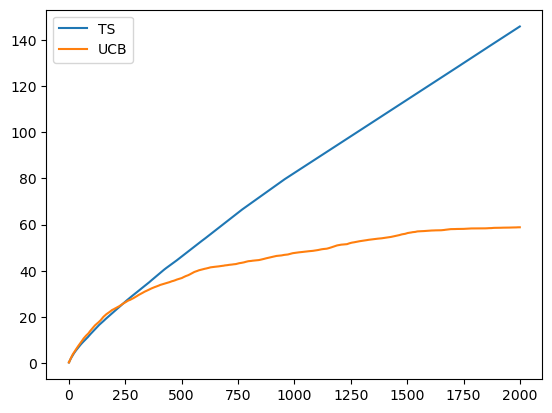

In [17]:
T=2000
N=30
mu = np.array([0.3, 0.5, 0.25, 0.1])
B = GaussianBandit(mu)
K=len(mu)

regrets = np.zeros((T,N))
for n in range(N):
    emp_means = np.zeros(K)
    nb_pulls = np.zeros(K)
    actions = np.zeros(T, dtype=int)
    for t in range(T):
        arm = TS(emp_means, nb_pulls, t)
        actions[t] = arm
        rewards = B.sample(arm)
        regrets[t,n] = regret(mu, actions[:t+1])[t]
        nb_pulls[arm] += 1
        emp_means[arm] = (emp_means[arm]*(nb_pulls[arm]-1) + rewards)/nb_pulls[arm]
mean_regret = np.mean(regrets, axis=1)
plt.plot(mean_regret)

regrets = np.zeros((T,N))
for n in range(N):
    emp_means = np.zeros(K)
    nb_pulls = np.zeros(K)
    actions = np.zeros(T, dtype=int)
    for t in range(T):
        arm = UCB(emp_means, nb_pulls, t,1)
        actions[t] = arm
        rewards = B.sample(arm)
        regrets[t,n] = regret(mu, actions[:t+1])[t]
        nb_pulls[arm] += 1
        emp_means[arm] = (emp_means[arm]*(nb_pulls[arm]-1) + rewards)/nb_pulls[arm]
mean_regret = np.mean(regrets, axis=1)
plt.plot(mean_regret)

plt.legend(["TS","UCB"])

plt.show()

C:\Users\NICOLAS\AppData\Local\Temp\ipykernel_14324\3325522894.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  emp_means[arm] = (emp_means[arm]*(nb_pulls[arm]-1) + rewards)/nb_pulls[arm]
C:\Users\NICOLAS\AppData\Local\Temp\ipykernel_14324\3325522894.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  emp_means[arm] = (emp_means[arm]*(nb_pulls[arm]-1) + rewards)/nb_pulls[arm]


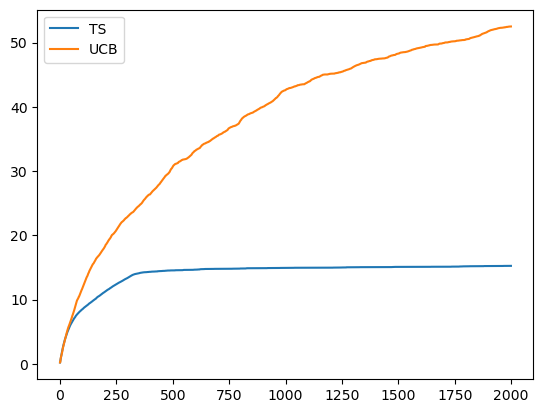

In [18]:
T=2000
N=30
mu = np.array([0.3, 0.5, 0.25, 0.1])
B = BernoulliBandit(mu)
K=len(mu)

regrets = np.zeros((T,N))
for n in range(N):
    emp_means = np.zeros(K)
    nb_pulls = np.zeros(K)
    actions = np.zeros(T, dtype=int)
    for t in range(T):
        arm = TS(emp_means, nb_pulls, t)
        actions[t] = arm
        rewards = B.sample(arm)
        regrets[t,n] = regret(mu, actions[:t+1])[t]
        nb_pulls[arm] += 1
        emp_means[arm] = (emp_means[arm]*(nb_pulls[arm]-1) + rewards)/nb_pulls[arm]
mean_regret = np.mean(regrets, axis=1)
plt.plot(mean_regret)

regrets = np.zeros((T,N))
for n in range(N):
    emp_means = np.zeros(K)
    nb_pulls = np.zeros(K)
    actions = np.zeros(T, dtype=int)
    for t in range(T):
        arm = UCB(emp_means, nb_pulls, t,1)
        actions[t] = arm
        rewards = B.sample(arm)
        regrets[t,n] = regret(mu, actions[:t+1])[t]
        nb_pulls[arm] += 1
        emp_means[arm] = (emp_means[arm]*(nb_pulls[arm]-1) + rewards)/nb_pulls[arm]
mean_regret = np.mean(regrets, axis=1)
plt.plot(mean_regret)

plt.legend(["TS","UCB"])

plt.show()

Thompson sampling can be adapted to the reward distributions by changing the prior: if the rewards are Gaussian, a Gaussian prior makes sense and leads to a Gaussian posterior. If the rewards are Bernoulli, we can use a uniform prior, which leads to a Beta posterior (see lecture 6 for the precise parameters of the Beta posterior).

**Implement TS with uniform prior and Beta posterior**

In [37]:
def TS_beta(emp_means, nb_pulls, t,type_bandit):
    """
    TS arm selection

    emp_means: numpy.ndarray; vector of empirical means of the arms
    nb_pulls: numpy.ndarray; number of times each arm was chosen previously
    t: int; current time
    
    Returns: int; arm selected by TS
    """
    pulls=np.zeros(len(emp_means))
    for k in range(len(emp_means)):
        if nb_pulls[k]==0:
            #choose uniformly an arm at random
            pulls[k]=np.random.choice(len(emp_means))
        else:
            if type_bandit=="Bernouilli":
                pulls[k]=np.random.beta(emp_means[k]*(nb_pulls[k])+1,1+nb_pulls[k]-emp_means[k]*(nb_pulls[k]))
            elif type_bandit=="Gaussian":
                alpha_posterior =max(1e-6, 1 + emp_means[k] * nb_pulls[k])
                beta_posterior = max(1e-6,1 + (1 - emp_means[k]) * nb_pulls[k])
            
            # Sample from the posterior Beta distribution
                pulls[k] = np.random.beta(alpha_posterior, beta_posterior)
    return np.argmax(pulls)

**On a Gaussian bandit, compare the regret of TS with Gaussian prior, TS with Bernoulli prior, and UCB.**

C:\Users\NICOLAS\AppData\Local\Temp\ipykernel_14324\2904378320.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  emp_means[arm] = (emp_means[arm]*(nb_pulls[arm]-1) + rewards)/nb_pulls[arm]
C:\Users\NICOLAS\AppData\Local\Temp\ipykernel_14324\2904378320.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  emp_means[arm] = (emp_means[arm]*(nb_pulls[arm]-1) + rewards)/nb_pulls[arm]
C:\Users\NICOLAS\AppData\Local\Temp\ipykernel_14324\2904378320.py:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operati

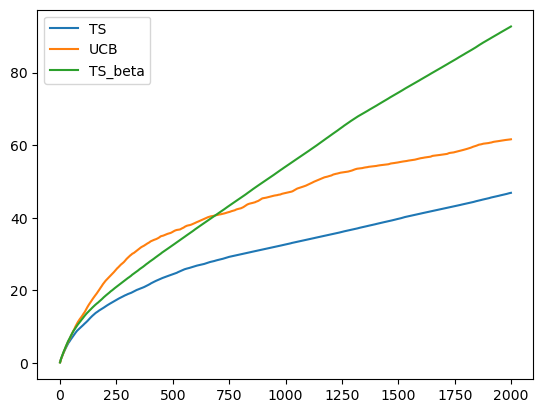

In [38]:
T=2000
N=30
mu = np.array([0.3, 0.5, 0.25, 0.1])
B = GaussianBandit(mu)
K=len(mu)

regrets = np.zeros((T,N))
for n in range(N):
    emp_means = np.zeros(K)
    nb_pulls = np.zeros(K)
    actions = np.zeros(T, dtype=int)
    for t in range(T):
        arm = TS(emp_means, nb_pulls, t)
        actions[t] = arm
        rewards = B.sample(arm)
        regrets[t,n] = regret(mu, actions[:t+1])[t]
        nb_pulls[arm] += 1
        emp_means[arm] = (emp_means[arm]*(nb_pulls[arm]-1) + rewards)/nb_pulls[arm]
mean_regret = np.mean(regrets, axis=1)
plt.plot(mean_regret)

regrets = np.zeros((T,N))
for n in range(N):
    emp_means = np.zeros(K)
    nb_pulls = np.zeros(K)
    actions = np.zeros(T, dtype=int)
    for t in range(T):
        arm = UCB(emp_means, nb_pulls, t,1)
        actions[t] = arm
        rewards = B.sample(arm)
        regrets[t,n] = regret(mu, actions[:t+1])[t]
        nb_pulls[arm] += 1
        emp_means[arm] = (emp_means[arm]*(nb_pulls[arm]-1) + rewards)/nb_pulls[arm]
mean_regret = np.mean(regrets, axis=1)
plt.plot(mean_regret)

regrets = np.zeros((T,N))
for n in range(N):
    emp_means = np.zeros(K)
    nb_pulls = np.zeros(K)
    actions = np.zeros(T, dtype=int)
    eps_0=100
    for t in range(T):
        arm = TS_beta(emp_means, nb_pulls, t,"Gaussian")
        actions[t] = arm
        rewards = B.sample(arm)
        regrets[t,n] = regret(mu, actions[:t+1])[t]
        nb_pulls[arm] += 1
        emp_means[arm] = (emp_means[arm]*(nb_pulls[arm]-1) + rewards)/nb_pulls[arm]
mean_regret = np.mean(regrets, axis=1)
plt.plot(mean_regret)

plt.legend(["TS","UCB","TS_beta"])

plt.show()

**On a Bernoulli bandit, compare the regret of TS with Gaussian prior, TS with Bernoulli prior, and UCB.**

C:\Users\NICOLAS\AppData\Local\Temp\ipykernel_14324\3944807625.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  emp_means[arm] = (emp_means[arm]*(nb_pulls[arm]-1) + rewards)/nb_pulls[arm]
C:\Users\NICOLAS\AppData\Local\Temp\ipykernel_14324\3944807625.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  emp_means[arm] = (emp_means[arm]*(nb_pulls[arm]-1) + rewards)/nb_pulls[arm]
C:\Users\NICOLAS\AppData\Local\Temp\ipykernel_14324\3944807625.py:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operati

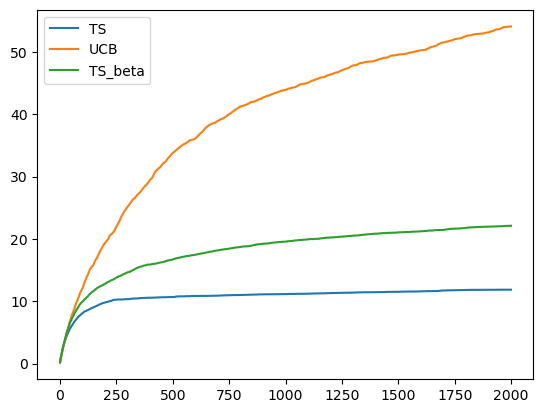

In [34]:
T=2000
N=30
mu = np.array([0.3, 0.5, 0.25, 0.1])
B = BernoulliBandit(mu)
K=len(mu)

regrets = np.zeros((T,N))
for n in range(N):
    emp_means = np.zeros(K)
    nb_pulls = np.zeros(K)
    actions = np.zeros(T, dtype=int)
    for t in range(T):
        arm = TS(emp_means, nb_pulls, t)
        actions[t] = arm
        rewards = B.sample(arm)
        regrets[t,n] = regret(mu, actions[:t+1])[t]
        nb_pulls[arm] += 1
        emp_means[arm] = (emp_means[arm]*(nb_pulls[arm]-1) + rewards)/nb_pulls[arm]
mean_regret = np.mean(regrets, axis=1)
plt.plot(mean_regret)

regrets = np.zeros((T,N))
for n in range(N):
    emp_means = np.zeros(K)
    nb_pulls = np.zeros(K)
    actions = np.zeros(T, dtype=int)
    for t in range(T):
        arm = UCB(emp_means, nb_pulls, t,0.1)
        actions[t] = arm
        rewards = B.sample(arm)
        regrets[t,n] = regret(mu, actions[:t+1])[t]
        nb_pulls[arm] += 1
        emp_means[arm] = (emp_means[arm]*(nb_pulls[arm]-1) + rewards)/nb_pulls[arm]
mean_regret = np.mean(regrets, axis=1)
plt.plot(mean_regret)

regrets = np.zeros((T,N))
for n in range(N):
    emp_means = np.zeros(K)
    nb_pulls = np.zeros(K)
    actions = np.zeros(T, dtype=int)
    eps_0=100
    for t in range(T):
        arm = TS_beta(emp_means, nb_pulls, t,"Bernouilli")
        actions[t] = arm
        rewards = B.sample(arm)
        regrets[t,n] = regret(mu, actions[:t+1])[t]
        nb_pulls[arm] += 1
        emp_means[arm] = (emp_means[arm]*(nb_pulls[arm]-1) + rewards)/nb_pulls[arm]
mean_regret = np.mean(regrets, axis=1)
plt.plot(mean_regret)

plt.legend(["TS","UCB","TS_beta"])

plt.show()

**How could the UCB algorithm be improved to have a lower regret on Bernoulli bandits, if we know beforehand that the distributions are Bernoulli?**

#TODO